#### Import packages

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os
from PIL import Image

#### Define functions

In [3]:
def load_img(img_path):
    """Resizes an image."""
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256,192))

    return img

def img2npy(depth_path):
    """Converts an image to a numpy array."""
    depth = Image.open(depth_path)
    depth = np.asarray(depth).squeeze()

    return depth

def show_pred_ihu(sample):
    """Displays IHU predictions."""
    cmap = plt.cm.jet
    cmap.set_bad(color='black')

    fig, ax = plt.subplots(4, 5, figsize=(27, 17))
    for i in range(5):
        ax[0, i].imshow(load_img(sample["IHU"][i]))
        ax[1, i].imshow(np.load(sample["BANet"][i]).squeeze(), cmap=cmap)
        ax[2, i].imshow(img2npy(sample["LapDepth"][i]).squeeze(), cmap=cmap)
        ax[3, i].imshow(np.load(sample["PixelFormer"][i]).squeeze(), cmap=cmap)
        for j in range (4):
            ax[j, i].axis('off')

    plt.tight_layout()
    plt.show()

#### Display IHU predictions

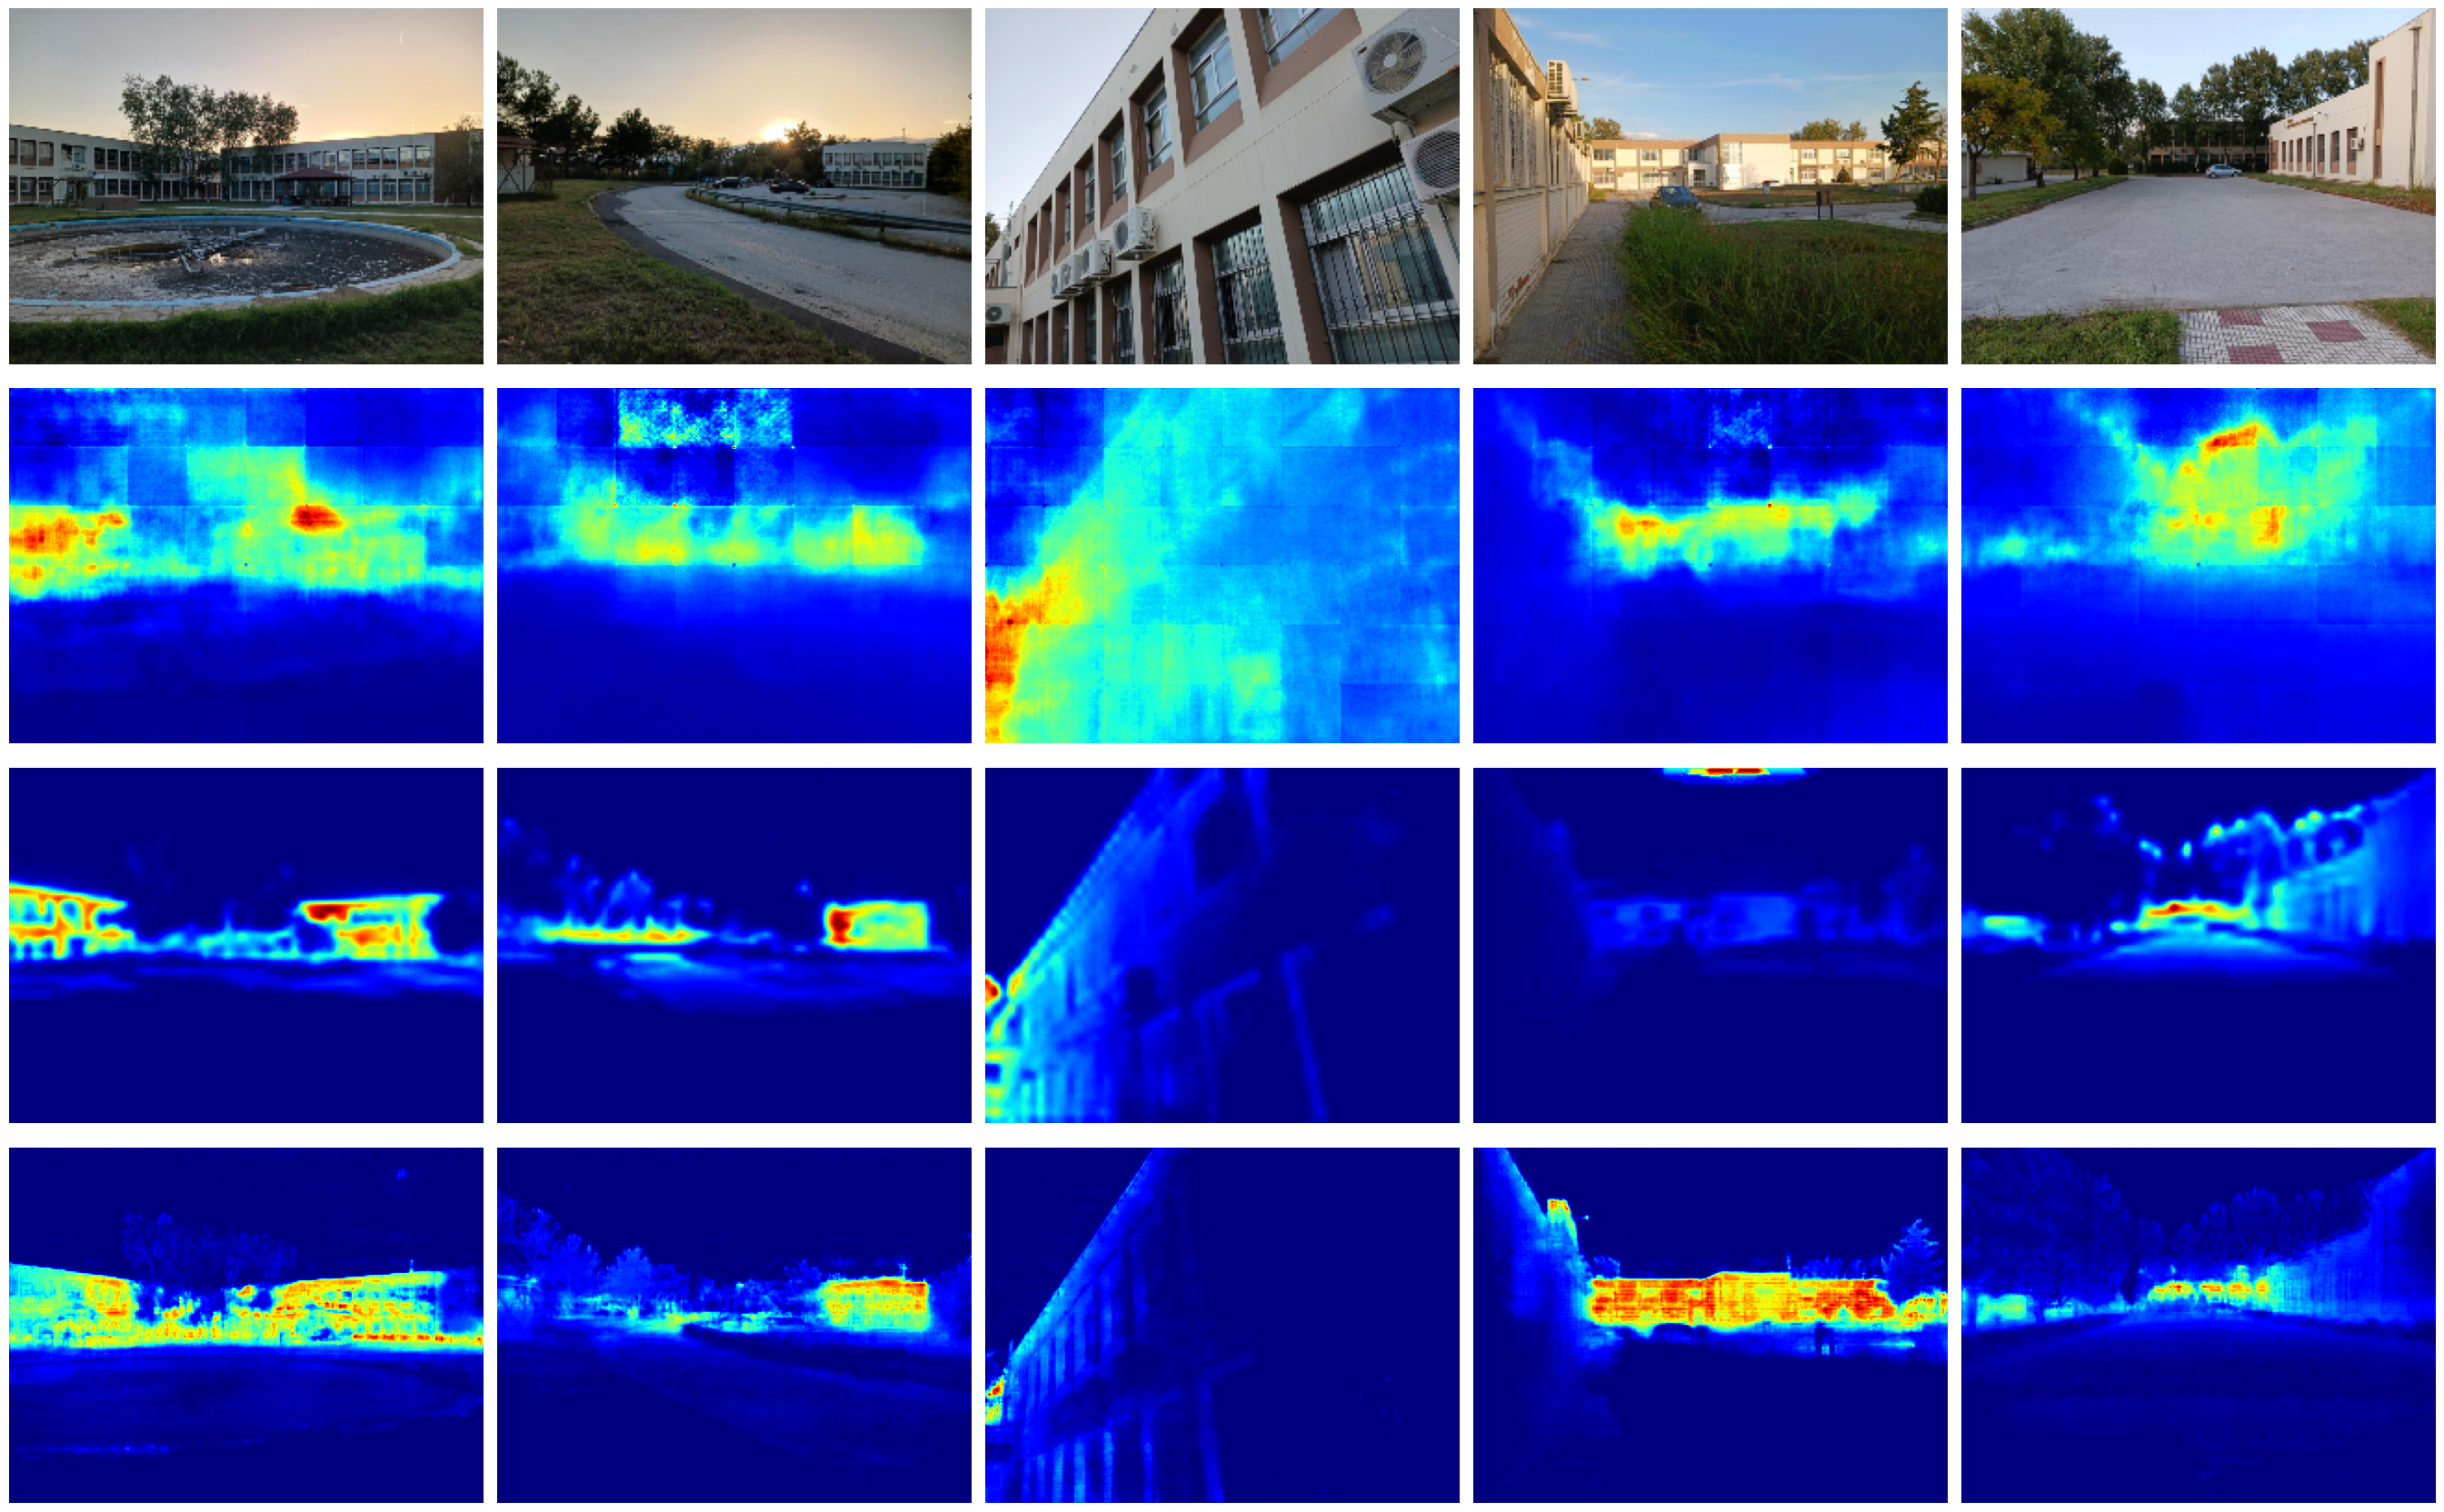

In [4]:
# set path to IHU folder
os.chdir('D:\\Informatics\\Μεταπτυχιακό\\Εξάμηνο Γ\\dataset\\IHU')
ihu = pd.read_csv('ihu.csv', header=None)
ihu.columns = ['image']

# get predictions
pred_BANet = os.listdir('D:\\Informatics\\Μεταπτυχιακό\\Εξάμηνο Γ\\models\\BANet\\prediction\\IHU')
pred_LapDepth = os.listdir('D:\\Informatics\\Μεταπτυχιακό\\Εξάμηνο Γ\\models\\LapDepth\\prediction\\IHU')
pred_PixelFormer = os.listdir('D:\\Informatics\\Μεταπτυχιακό\\Εξάμηνο Γ\\models\\PixelFormer\\prediction\\IHU')
test = pd.DataFrame(index=range(len(pred_BANet)),columns=range(4))
test.columns = ['IHU', 'BANet', 'LapDepth', 'PixelFormer']

# fill the test dataset
for i in range(len(pred_BANet)):
    for j in range(len(ihu)):
        if ihu['image'][j].split('/')[2][:-4] == pred_BANet[i][:-4]:
            test['IHU'][i] = ihu['image'][j]
            test['BANet'][i] = '../../models/BANet/prediction/IHU/'+pred_BANet[i]
            test['LapDepth'][i] = '../../models/LapDepth/prediction/IHU/'+pred_LapDepth[j]
            test['PixelFormer'][i] = '../../models/PixelFormer/prediction/IHU/'+pred_PixelFormer[j]
            break

# shuffle the test dataset
test = test.sample(frac=1)
test = test.reset_index()

# show predictions
show_pred_ihu(test)